In [28]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats
B=2
a=6
N=30
T=100
#st=0.4
A=
st=0.4
n=np.arange(1,N+1,1,dtype=float)
u=a*B**(-n)   #u(n)
r=np.e**(-u)   #r(n)
W=np.sqrt((12*(1-r**2)*(B**(0.5-st)-B**(st-0.5))*((a*B**(-n))**(1-2*st)))/np.random.gamma(2-2*st))
uu_noise=np.random.uniform(0,1,[T,N])
X=np.zeros((T,N))
et=np.zeros(T)
b=0
for nx in range(N):             #main loop for FFGN
    X[0,nx]=(uu_noise[0,nx]-0.5)/(1-r[nx]**2)**0.5
    for t in range(T):
        X[t,nx]=r[nx]*X[t-1,nx]+(uu_noise[t,nx]-0.5)
        
for t in range(T):
    for nx in range(N):
        b += X[t,nx]* W[nx]
    et[t]=b
    b=0
if
ffgn=et

100


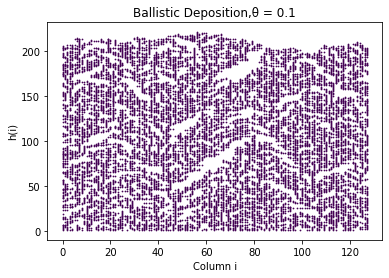

In [28]:
#BD形貌图
import matplotlib.pyplot as plt
import math
import numpy as np
 

L = 2048                      #基底尺寸
re = 1000                     #系综平均
T = 350                       #模拟时间
l = range(0, L)


for times in range(re):
    h = np.zeros(L, dtype=int) # h[i] shows the height at i.
    w = np.array([])
    for t in range(T):# Main loop of BD Model
        for i in range(L):
            i = rd.randint(0, L-1)               # Select a random site
            if 0 < i < L-1:
                h[i % L] = max(h[i % L] + 1, h[(i-1) % L], h[(i+1) % L])# Add a particle to the random selected site
            elif i == L-1:
                h[i % L] = max(h[i % L] + 1, h[(i-1) % L], h[(0) % L])# 周期性边界条件
            elif i == 0:
                h[i % L] = max(h[i % L] + 1, h[(L-1) % L], h[(1) % L])
            plt.subplot(1,2,1)
            plt.scatter(l[i], h[i], c = np.arctan2(h[i],l[i]), s = 0.55)
            
            wt = np.std(h)
            w = np.append(w, wt)
    W=W+w
    
W = W/re
xlog = np.log10 (np.arange(1, T+1))
ylog = np.log10 (W)
plt.subplot(1,2,2)
plt.plot (xlog, ylog,label='original data')
        

plt.title('BD 1+1')  
plt.ylabel("log10 W")
plt.xlabel("log10 t")
plt.show()

In [8]:
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import random as rd

In [9]:
def ffgn(st,T):
    B=2
    a=6
    N=30
    n=np.arange(1,N+1,1,dtype=float)
    u=a*B**(-n)   #u(n)
    r=np.e**(-u)   #r(n)
    W=np.sqrt((12*(1-r**2)*(B**(0.5-st)-B**(st-0.5))*((a*B**(-n))**(1-2*st)))/np.random.gamma(2-2*st))
    uu_noise=np.random.uniform(0,1,[N,T])
    X=np.zeros((N,T))
    et=np.zeros(T)
    b=0
    for nx in range(N):             #main loop for FFGN
        X[nx,0]=(uu_noise[nx,0]-0.5)/(1-r[nx]**2)**0.5
        for t in range(T):
            X[nx,t]=r[nx]*X[nx,t-1]+(uu_noise[nx,t]-0.5)

    for t in range(T):
        for nx in range(N):
            b += X[nx,t]* W[nx]
        et[t]=b
        if et[t]<0:
            et[t]=0
        elif et[t]>=0:
            et[t]=1
        b=0

    return et

KeyboardInterrupt: 

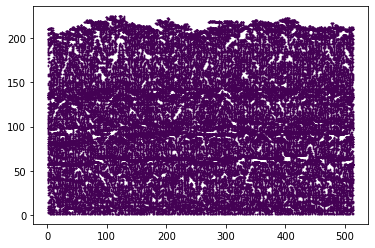

In [14]:
#计算BD的early-time-exponent
L = 512        #模拟尺寸
T = 300         #模拟时间
re = 100       #重复次数
W = np.zeros(T) #粗糙度
A=ffgn(0.2,T)     #长程关联噪声
l=np.arange(1, L+2)
from random import randrange

for times in range(re):
    h = np.zeros(L+2, dtype=int)#上一时刻
    h1 = h
    w = np.array([])
    for t in range(T):
        h[0]=h[L]
        h[L+1]=h[1]
        for i in range(1,L+1):      #按层沉积
            j = randrange(1,L+1)        # Select a random site
            h1[j] = max(h[j-1], h[j]+A[t], h[j+1])
            plt.scatter(l[j], h1[j], c = np.arctan2(h1[j],l[j]), s = 0.55)
        wt = np.std(h1)
        w = np.append(w, wt)
        h = h1
    W=W+w
        
plt.title('BD 1+1')  

plt.show()

In [ ]:
#定性沉积
L = 4096
t = 800
re = 10
l = np.arange(1, L+1)


for times in range(re):
    h = np.zeros(L, dtype=int)
    for time in range(t):
        for j in range(L):
            i = rd.randint(0, L-1)
            if i==0:
                h[i] = max(h[L-1], h[i]+1, h[i+1])
            elif i==L-1:
                h[i] = max(h[i-1], h[i]+1, h[0])
            else: 
                h[i] = max(h[i-1], h[i]+1, h[i+1])
            plt.scatter(l[i], h[i], c = np.arctan2(h[i],l[i]), s = 0.55)
plt.title('Ballistic Deposition,θ = 0')  
plt.ylabel("h(i)")
plt.xlabel("Column i")
plt.show()

In [ ]:
#计算beta的画图
xlog = np.log10 (np.arange(1, T+1))
ylog = np.log10 (W)

plt.plot (xlog, ylog,label='original data')
plt.title('BD 1+1')  
plt.ylabel("log10 W")
plt.xlabel("log10 t")
plt.show()

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import mpl_toolkits.axisartist as axisartist

fig = plt.figure()

In [27]:
def ffgn(st,T):
    B=2
    a=6
    N=30
    n=np.arange(1,N+1,1,dtype=float)
    u=a*B**(-n)   #u(n)
    r=np.e**(-u)   #r(n)
    W=np.sqrt((12*(1-r**2)*(B**(0.5-st)-B**(st-0.5))*((a*B**(-n))**(1-2*st)))/np.random.gamma(2-2*st))
    uu_noise=np.random.uniform(0,1,[N,T])
    X=np.zeros((N,T))
    et=np.zeros(T)
    b=0
    for nx in range(N):             #main loop for FFGN
        X[nx,0]=(uu_noise[nx,0]-0.5)/(1-r[nx]**2)**0.5
        for t in range(T):
            X[nx,t]=r[nx]*X[nx,t-1]+(uu_noise[nx,t]-0.5)

    for t in range(T):
        for nx in range(N):
            b += X[nx,t]* W[nx]
        et[t]=b
        b=0
        
    return et

In [15]:
#计算 β
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
import math
from math import e


L = 1024                           # asal lateral scale
h = np.zeros(L)                    # h[i] shows the height at i.
t = 1                              # The current time
T = 800                        # t change from 0 to t1
l = range(0, L)
re=50
W = np.zeros(T)

def Wl(L,t):
    x = 0
    wl = 0
    while x < L:
        wl += (h[x] - np.average(h))**2/L 
        x = x+1
    return (wl) ** 0.5

for times in range(re):
    h = np.zeros(L, dtype=int)
    w = np.array([])
    for t in range(T):# Main loop of BD Model
        for i in range(L):
            StepSize = round(1 + t)        # Size of the following loop
            i = randrange(L)               # Select a random site
            if 0 < i < L-1:
                h[i % L] = max(h[i % L] + 1, h[(i-1) % L], h[(i+1) % L])# Add a particle to the random selected site
            if i == L-1:
                h[i % L] = max(h[i % L] + 1, h[(i-1) % L], h[(0) % L])# Add a particle to the random selected site
            if i == 0:
                h[i % L] = max(h[i % L] + 1, h[(L-1) % L], h[(1) % L])
            wt = np.std(h)
            w = np.append(w, wt)
    W=W+w
W=W/re
xlog = np.log10 (np.arange(1, T+1))
ylog = np.log10 (W)
    
print(StepSize)
plt.plot (xlog, ylog,label='original data')
plt.title('Ballistic Deposition, θ = 0')  
plt.ylabel("log W")
plt.xlabel("log t")
plt.show()

ValueError: operands could not be broadcast together with shapes (800,) (819200,) 

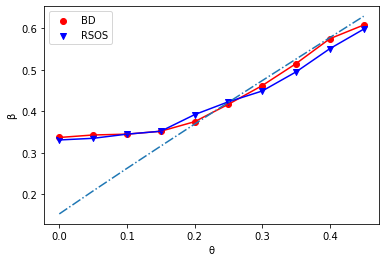

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
import math
a=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
b=[0.337,0.343,0.345,0.352,0.375,0.417,0.462,0.515,0.575,0.608]
c=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
d=[0.331,0.335,0.345,0.352,0.392,0.423,0.449,0.495,0.551,0.598]
for i in range(10):
    x1=a[i]
    y1=b[i]
    ty1=plt.scatter(x1,y1,c='r')
plt.plot(a,b,'r')
for j in range(10):
    x2=c[j]
    y2=d[j]
    ty2=plt.scatter(x2,y2,c='b',marker='v')
plt.plot(c,d,'b')
theta=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
def alpha(theta):
    return 1.69*theta+0.22
def beta(theta):
    return (1+2*theta)*alpha(theta)/(2*alpha(theta)+1)
x=np.zeros(10)
y=np.zeros(10)
for i in range(10):
    y[i]=beta(theta[i])
plt.plot(theta,y,'-.')
 
plt.ylabel('β')
plt.xlabel('θ')
plt.legend((ty1,ty2),('BD','RSOS'))
plt.show()

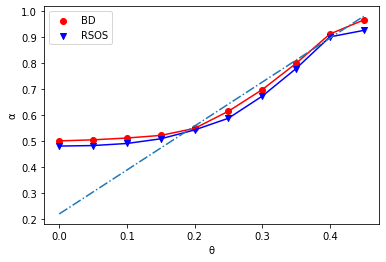

In [2]:
#计算roughness exponent
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
import math
a=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
b=[0.501,0.505,0.512,0.522,0.549,0.615,0.698,0.799,0.912,0.966]
c=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
d=[0.481,0.483,0.491,0.509,0.543,0.588,0.673,0.779,0.901,0.926]
for i in range(10):
    x1=a[i]
    y1=b[i]
    ty1=plt.scatter(x1,y1,c='r')
plt.plot(a,b,'r')
for j in range(10):
    x2=c[j]
    y2=d[j]
    ty2=plt.scatter(x2,y2,c='b',marker='v')
plt.plot(c,d,'b')

def alpha(theta):
    return 1.69*theta+0.22

for i in range(10):
    x[i]=alpha(a[i])
    a[i]

plt.plot(a,x,'-.', label='DRG') 
plt.ylabel('α')
plt.xlabel('θ')
plt.legend((ty1,ty2),('BD','RSOS'))
plt.show()

<ipython-input-48-afaa7e93a033>:15: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fc1ea893880>, <matplotlib.lines.Line2D object at 0x7fc1ea893a90>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend((ty3,ty4),('α','β'))
<ipython-input-48-afaa7e93a033>:15: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fc1ea893fd0>, <matplotlib.lines.Line2D object at 0x7fc1ea893760>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend((ty3,ty4),('α','β'))


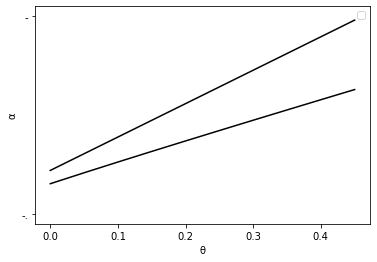

In [48]:
theta=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
def alpha(theta):
    return 1.69*theta+0.22
def beta(theta):
    return (1+2*theta)*a(theta)/(2*a(theta)+1)
x=np.zeros(10)
y=np.zeros(10)
for i in range(10):
    x[i]=a(theta[i])
    y[i]=b(theta[i])
ty3=plt.plot(theta,x,'black','-.')
ty4=plt.plot(theta,y,'black','-')
plt.ylabel('α')
plt.xlabel('θ')
plt.legend((ty3,ty4),('α','β'))
plt.show()
    


β = nan
2


/Users/zichen/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/zichen/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/zichen/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:183: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)


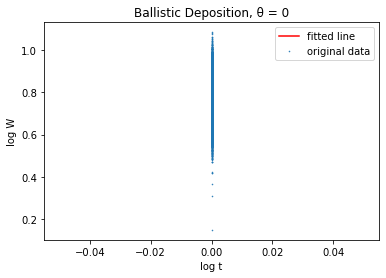

In [21]:
#计算 β
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
from scipy import stats
import math
from math import e


L = 4096                           # asal lateral scale
h = np.zeros(L)                    # h[i] shows the height at i.
t = 1                              # The current time
t1 = 300                        # t change from 0 to t1
l = range(0, L)

def Wl(L,t):
    x = 0
    wl = 0
    while x < L:
        wl += (h[x] - np.average(h))**2/L 
        x = x+1
    return (wl) ** 0.5
y=[]
x=[]
for j in range(t1):# Main loop of BD Model
    for i in range(L):
        StepSize = round(1 + t)        # Size of the following loop
        i = randrange(L)               # Select a random site
        if 0 < i < L-1:
            h[i % L] = max(h[i % L] + 1, h[(i-1) % L], h[(i+1) % L])# Add a particle to the random selected site
        if i == L-1:
            h[i % L] = max(h[i % L] + 1, h[(i-1) % L], h[(0) % L])# Add a particle to the random selected site
        if i == 0:
            h[i % L] = max(h[i % L] + 1, h[(L-1) % L], h[(1) % L])
    j = j+1                         # Increase time 
    if ( math.log10(t) < 1.5):
        y.append(math.log(Wl(L,j),10))
        x.append(math.log(t,10))
        
res = stats.linregress(x, y)
x=np.array(x)
plt.plot(x, res.intercept + res.slope*x, color='r', label='fitted line',)
print('β =',res.slope)        
print(StepSize)
plt.plot(x, y, 'o',ms=0.55, label='original data')
plt.title('Ballistic Deposition, θ = 0')  
plt.ylabel("log W")
plt.xlabel("log t")
plt.legend()
plt.show()

In [32]:
np.average(h)

158.38671875

255


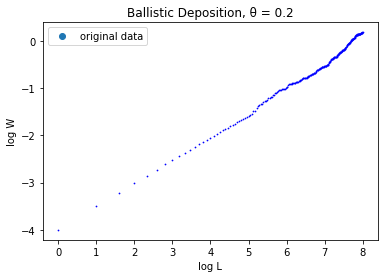

In [33]:
#计算 α
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
from scipy import stats

L = 4096                            # asal lateral scale
h = np.zeros(L)                    # h[i] shows the height at i.


tm = 300                         # t change from 0 to t1
l = range(0, L)
t = range(0, tm)
axes = plt.gca()

#interface width
def Wl(L,t):
    x = 0
    global wl
    wl = 0
    while x < L:
        wl += (h[x] - np.average(h))**2
        x = x+1
    return (wl/L) ** 0.5
j=0
x=[]
y=[]
while (l[j] < L-1):                    # Main loop of BD Model
    StepSize = round(1+j)        # Size of the following loop
    i = randrange(L)               # Select a random site
    h[i % L] = max(h[i % L] + 1, h[(i-1) % L], h[(i+1) % L])# Add a particle to the random selected site
    j = j+1                         # Increase time 
    plt.scatter(math.log(l[j],2), math.log(Wl(L,t),2), c= 'blue', s = 0.55)
        
      
print(StepSize)
plt.plot(x, y, 'o', label='original data')
plt.title('Ballistic Deposition, θ = 0.2')  
plt.ylabel("log W")
plt.xlabel("log L")
plt.legend()
plt.show()

α = 0.5329023275785234
255


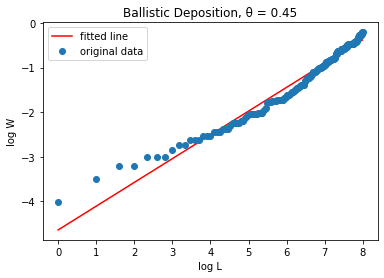

In [95]:
#计算 α
import math
from math import e
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
from scipy import stats
N = 8
L = 2**N                           # asal lateral scale
h = np.zeros(L)                    # h[i] shows the height at i.


    
m = 400
tm = 50*m                          # t change from 0 to t1
l = range(0, L)
t = range(0, tm)
axes = plt.gca()

#interface width
def Wl(L,t):
    x = 0
    global wl
    wl = 0
    while x < L:
        wl += (h[x] - np.average(h))**2
        x = x+1
    return (wl/L) ** 0.5
j=0
x=[]
y=[]
while (l[j] < L-1):                 # Main loop of BD Model
    StepSize = round(1+j)           # Size of the following loop
    i = randrange(L)                # Select a random site
    h[i % L] = max(h[i % L] + FFGN(), h[(i-1) % L], h[(i+1) % L])# Add a particle to the random selected site
    j = j+1                         # Increase time 
    x.append(math.log(l[j],2))
    y.append(math.log(Wl(L,t),2))
        
res = stats.linregress(x, y)
x=np.array(x)
plt.plot(x, res.intercept + res.slope*x, color='r', label='fitted line',)
print('α =',res.slope)        
print(StepSize)
plt.plot(x, y, 'o', label='original data')
plt.title('Ballistic Deposition, θ = 0.45')  
plt.ylabel("log W")
plt.xlabel("log L")
plt.legend()
plt.show()

In [6]:
y = [0.58079,0.5812,0.58173,0.59543,0.60382,0.60732]
x = [0.1,0.2,0.3,0.4,0.5,0.6]

In [11]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats

In [7]:
x=np.arange(10)
y1=np.arange(1,11)
y2=np.arange(2,12)
y3=np.arange(3,13)
y4=np.arange(4,14)

<function matplotlib.pyplot.show(close=None, block=None)>

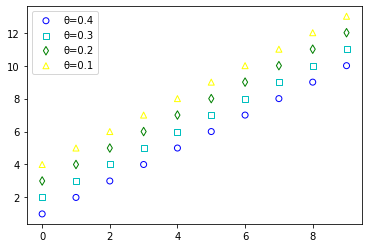

In [10]:
plt.scatter(x,y1,c = 'none', edgecolors= 'blue', alpha = 1 ,label=r"θ=0.4")
plt.scatter(x,y2,c = 'none', edgecolors= 'c', marker = 's',alpha = 1 ,label=r"θ=0.3")
plt.scatter(x,y3,c = 'none', edgecolors= 'green', marker = 'd',alpha = 1 ,label=r"θ=0.2")
plt.scatter(x,y4,c = 'none', edgecolors= 'yellow',marker = '^', alpha = 1 ,label=r"θ=0.1")
plt.legend()
plt.show